# Eredivisie Data Research #

In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Patch


## Loading the data ##

In [3]:
uncleaned_data = pd.read_csv('C:/Users/Rodolfo Amorim/Desktop/Football_Research/Football-Research/Matches.csv')

C:\Users\Rodolfo Amorim\AppData\Local\Temp\ipykernel_21048\1179026820.py:1: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  uncleaned_data = pd.read_csv('C:/Users/Rodolfo Amorim/Desktop/Football_Research/Football-Research/Matches.csv')


In [4]:
uncleaned_data.head()

,Division,MatchDate,MatchTime,HomeTeam,AwayTeam,HomeElo,AwayElo,Form3Home,Form5Home,Form3Away,...,MaxUnder25,HandiSize,HandiHome,HandiAway,C_LTH,C_LTA,C_VHD,C_VAD,C_HTB,C_PHB
0,F1,2000-07-28,NaN,Marseille,Troyes,1686.34,1586.57,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,F1,2000-07-28,NaN,Paris SG,Strasbourg,1714.89,1642.51,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,F2,2000-07-28,NaN,Wasquehal,Nancy,1465.08,1633.80,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,F1,2000-07-29,NaN,Auxerre,Sedan,1635.58,1624.22,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,F1,2000-07-29,NaN,Bordeaux,Metz,1734.34,1673.11,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
#Primeira Liga Dataframe 
eredivisie_dataframe = uncleaned_data[uncleaned_data['Division'] == 'N1']
eredivisie_dataframe 

,Division,MatchDate,MatchTime,HomeTeam,AwayTeam,HomeElo,AwayElo,Form3Home,Form5Home,Form3Away,...,MaxUnder25,HandiSize,HandiHome,HandiAway,C_LTH,C_LTA,C_VHD,C_VAD,C_HTB,C_PHB
122,N1,2000-08-18,NaN,Sparta,Roda JC,NaN,NaN,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
141,N1,2000-08-19,NaN,Graafschap,PSV Eindhoven,1424.63,1742.15,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
142,N1,2000-08-19,NaN,Feyenoord,AZ Alkmaar,1661.08,1507.67,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
143,N1,2000-08-19,NaN,NAC Breda,Waalwijk,1380.35,1407.50,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
205,N1,2000-08-20,NaN,Groningen,Willem II,1380.35,1503.96,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
230422,N1,2025-05-18,13:30:00,Heracles,Nijmegen,1416.63,1502.63,3.0,6.0,7.0,...,2.55,0.0,1.88,1.93,0.0223,0.1483,0.0259,0.0881,0.7003,0.0151
230423,N1,2025-05-18,13:30:00,NAC Breda,Willem II,1353.71,1321.88,0.0,2.0,1.0,...,2.08,-0.5,1.85,1.95,0.0469,0.2688,0.0966,0.0365,0.5360,0.0153
230424,N1,2025-05-18,13:30:00,Sparta Rotterdam,PSV Eindhoven,1497.50,1793.04,4.0,8.0,9.0,...,4.50,1.8,1.95,1.85,0.0140,0.0098,0.0098,0.9242,0.0323,0.0098
230425,N1,2025-05-18,13:30:00,Waalwijk,Go Ahead Eagles,1363.69,1513.18,3.0,3.0,4.0,...,3.15,0.3,1.85,1.95,0.0316,0.0119,0.0190,0.1701,0.7543,0.0131


#### Selecting the 2025 data

In [6]:
#Basically we iterate over all the values of the dataframe and find all the matches that occured in 2025
#If we wanted more years, say between 2020 and 2025, just change the list in the .isin() function to ['2020','2021','2022','2023','2024']

eredivisie_2025_dataframe = eredivisie_dataframe[eredivisie_dataframe.iloc[:,1].str[:4].isin(['2025'])]

In [7]:
eredivisie_2025_dataframe

,Division,MatchDate,MatchTime,HomeTeam,AwayTeam,HomeElo,AwayElo,Form3Home,Form5Home,Form3Away,...,MaxUnder25,HandiSize,HandiHome,HandiAway,C_LTH,C_LTA,C_VHD,C_VAD,C_HTB,C_PHB
227080,N1,2025-01-10,19:00:00,For Sittard,Go Ahead Eagles,1451.07,1487.68,7.0,8.0,7.0,...,2.04,0.3,1.81,2.09,0.0100,0.0193,0.0146,0.0349,0.9032,0.0180
227117,N1,2025-01-11,15:30:00,Heracles,Sparta Rotterdam,1357.99,1430.42,1.0,2.0,1.0,...,2.05,0.0,2.00,1.90,0.0315,0.0736,0.0100,0.2867,0.5803,0.0179
227127,N1,2025-01-11,17:45:00,Ajax,Waalwijk,1678.31,1338.15,6.0,10.0,1.0,...,4.20,-2.5,1.95,1.95,0.0098,0.0114,0.9385,0.0098,0.0207,0.0098
227131,N1,2025-01-11,19:00:00,Zwolle,Nijmegen,1404.45,1463.84,2.0,5.0,1.0,...,2.01,0.0,1.98,1.92,0.6648,0.1349,0.0105,0.1072,0.0371,0.0455
227134,N1,2025-01-11,20:00:00,PSV Eindhoven,AZ Alkmaar,1816.71,1610.66,6.0,12.0,9.0,...,3.05,-1.5,2.01,1.89,0.0180,0.2806,0.5818,0.0099,0.0996,0.0100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
230422,N1,2025-05-18,13:30:00,Heracles,Nijmegen,1416.63,1502.63,3.0,6.0,7.0,...,2.55,0.0,1.88,1.93,0.0223,0.1483,0.0259,0.0881,0.7003,0.0151
230423,N1,2025-05-18,13:30:00,NAC Breda,Willem II,1353.71,1321.88,0.0,2.0,1.0,...,2.08,-0.5,1.85,1.95,0.0469,0.2688,0.0966,0.0365,0.5360,0.0153
230424,N1,2025-05-18,13:30:00,Sparta Rotterdam,PSV Eindhoven,1497.50,1793.04,4.0,8.0,9.0,...,4.50,1.8,1.95,1.85,0.0140,0.0098,0.0098,0.9242,0.0323,0.0098
230425,N1,2025-05-18,13:30:00,Waalwijk,Go Ahead Eagles,1363.69,1513.18,3.0,3.0,4.0,...,3.15,0.3,1.85,1.95,0.0316,0.0119,0.0190,0.1701,0.7543,0.0131


In [8]:
## Dropping some variables
eredivisie_2025_dataframe = eredivisie_2025_dataframe.drop(columns=['Division'])

# Extracting Insights 


## Relation between Half-time results and Full-time results

In [9]:
ft_hf_results_eredivisie_2005 =  eredivisie_2025_dataframe[['FTResult','HTResult']]

# Check if there are any NaN values 
ft_hf_results_eredivisie_2005.isnull().values.any()

np.False_

In [10]:
#Doing cross-tabulation on the previous two variables data
ct_ft_hf_2025 = pd.crosstab(ft_hf_results_eredivisie_2005['HTResult'], ft_hf_results_eredivisie_2005['FTResult'])
ct_ft_hf_2025

FTResult,A,D,H
HTResult,,,
A,26,10,1
D,12,28,23
H,4,8,42


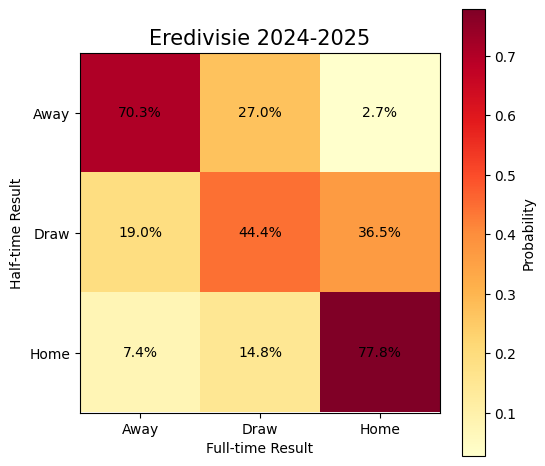

In [11]:
#Heatmap for the HF to FT transition 

#Creating the canvas for the plot 
fig, ax = plt.subplots(figsize=(5.8, 5.8))

#Finding the probability of the different transitions 
ct_ft_hf_2025_normalized = pd.crosstab(ft_hf_results_eredivisie_2005['HTResult'], ft_hf_results_eredivisie_2005['FTResult'],normalize='index')

#Making the heatmap
im = ax.imshow(ct_ft_hf_2025_normalized,cmap = 'YlOrRd') #cmap='YlOrBr'

    #Setting the axes
ax.set_xticks(range(len(ct_ft_hf_2025_normalized.columns)))
ax.set_xticklabels(['Away','Draw','Home'])
ax.set_yticks(range(len(ct_ft_hf_2025_normalized.columns)))
ax.set_yticklabels(['Away','Draw','Home'])

    #Labelling the different axes
ax.set_xlabel('Full‑time Result')
ax.set_ylabel('Half‑time Result')
fig.colorbar(im, location = 'right', label='Probability')
plt.title('Eredivisie 2024-2025',fontsize = 15)

for i in range(len(ct_ft_hf_2025_normalized.columns)):
    for j in range(len(ct_ft_hf_2025_normalized.columns)):
            text = ax.text(j, i, str(np.round(ct_ft_hf_2025_normalized.iloc[i, j]*100,1))+'%',
                         ha="center", va="center", color='black')
 

We can see that if a team is winning at half-time it most likely (>70% probability) **wins** the game, with this influence being heavier on the home team side.
If Half-time ends in a draw, it tends to end up either as a **draw** or the home team **winning**. 


## Shot efficiency and its relevancy

In [12]:
eredivisie_2025_shot_efficiency_dataframe = eredivisie_2025_dataframe[['HomeTeam','AwayTeam','FTResult','FTHome','FTAway','HomeShots','AwayShots','HomeTarget','AwayTarget']]
eredivisie_2025_shot_efficiency_dataframe = eredivisie_2025_shot_efficiency_dataframe.reset_index(drop=True)
eredivisie_2025_shot_efficiency_dataframe[:12]

,HomeTeam,AwayTeam,FTResult,FTHome,FTAway,HomeShots,AwayShots,HomeTarget,AwayTarget
0,For Sittard,Go Ahead Eagles,A,0.0,3.0,18.0,21.0,3.0,6.0
1,Heracles,Sparta Rotterdam,D,1.0,1.0,10.0,21.0,4.0,12.0
2,Ajax,Waalwijk,H,2.0,1.0,17.0,11.0,4.0,3.0
3,Zwolle,Nijmegen,A,0.0,1.0,8.0,10.0,3.0,3.0
4,PSV Eindhoven,AZ Alkmaar,D,2.0,2.0,18.0,8.0,4.0,5.0
5,Twente,Willem II,H,6.0,2.0,21.0,10.0,12.0,3.0
6,Feyenoord,Utrecht,A,1.0,2.0,16.0,11.0,5.0,3.0
7,Groningen,Almere City,D,0.0,0.0,18.0,5.0,5.0,1.0
8,NAC Breda,Heerenveen,A,2.0,4.0,15.0,14.0,6.0,6.0
9,Zwolle,PSV Eindhoven,H,3.0,1.0,7.0,18.0,3.0,4.0


In [59]:
#Creating dictionaries for all the teams in Eredivisie
total_team_dictionary = {}
home_team_dictionary = {}
away_team_dictionary = {}
for item in eredivisie_2025_shot_efficiency_dataframe['HomeTeam'].unique():
    total_team_dictionary[item] = []
    home_team_dictionary[item] = []
    away_team_dictionary[item] = []

Total shot to goal efficiency

In [60]:
for i in range(len(eredivisie_2025_shot_efficiency_dataframe)):
   
    efficiency_home = eredivisie_2025_shot_efficiency_dataframe.iloc[i,3]/eredivisie_2025_shot_efficiency_dataframe.iloc[i,7]
    efficiency_away = eredivisie_2025_shot_efficiency_dataframe.iloc[i,4]/eredivisie_2025_shot_efficiency_dataframe.iloc[i,8]

    if not(np.isnan(efficiency_home)):
        home_team_dictionary[eredivisie_2025_shot_efficiency_dataframe.iloc[i,0]].append(efficiency_home)

    if not(np.isnan(efficiency_away)):
        away_team_dictionary[eredivisie_2025_shot_efficiency_dataframe.iloc[i,1]].append(efficiency_away)

C:\Users\Rodolfo Amorim\AppData\Local\Temp\ipykernel_21048\3563010779.py:4: RuntimeWarning: invalid value encountered in scalar divide
  efficiency_away = eredivisie_2025_shot_efficiency_dataframe.iloc[i,4]/eredivisie_2025_shot_efficiency_dataframe.iloc[i,8]
C:\Users\Rodolfo Amorim\AppData\Local\Temp\ipykernel_21048\3563010779.py:3: RuntimeWarning: invalid value encountered in scalar divide
  efficiency_home = eredivisie_2025_shot_efficiency_dataframe.iloc[i,3]/eredivisie_2025_shot_efficiency_dataframe.iloc[i,7]


In [61]:
away_team_dictionary

{'For Sittard': [np.float64(0.5),
  np.float64(0.5),
  np.float64(0.0),
  np.float64(0.6666666666666666),
  np.float64(0.0),
  np.float64(1.0),
  np.float64(1.0),
  np.float64(0.5)],
 'Heracles': [np.float64(0.6666666666666666),
  np.float64(0.2),
  np.float64(0.0),
  np.float64(0.5),
  np.float64(0.0),
  np.float64(0.3333333333333333),
  np.float64(0.3333333333333333),
  np.float64(0.5)],
 'Ajax': [np.float64(0.2222222222222222),
  np.float64(0.3333333333333333),
  np.float64(0.5),
  np.float64(0.16666666666666666),
  np.float64(0.6666666666666666),
  np.float64(0.3333333333333333),
  np.float64(0.0),
  np.float64(0.6666666666666666)],
 'Zwolle': [np.float64(0.8),
  np.float64(0.0),
  np.float64(0.6666666666666666),
  np.float64(0.3333333333333333),
  np.float64(0.4),
  np.float64(0.0),
  np.float64(0.6),
  np.float64(0.3333333333333333)],
 'PSV Eindhoven': [np.float64(0.25),
  np.float64(0.5),
  np.float64(0.4),
  np.float64(0.42857142857142855),
  np.float64(0.75),
  np.float64(0.37

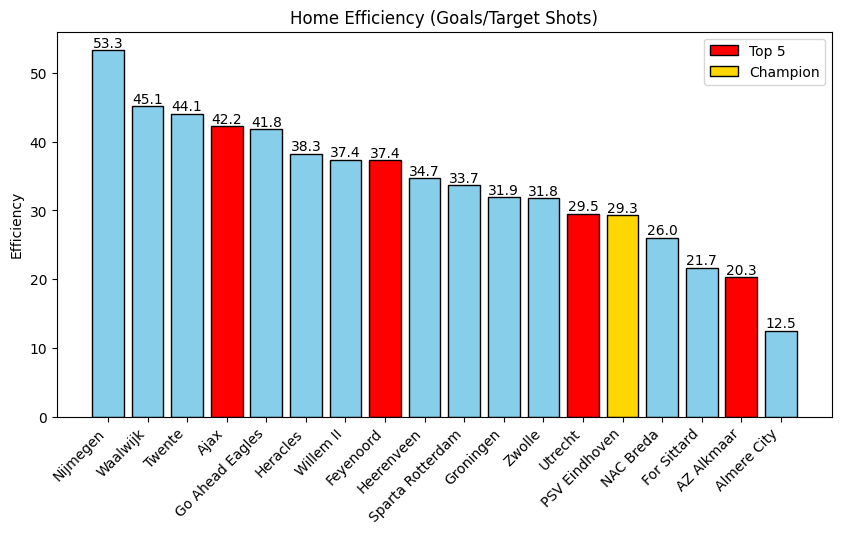

In [62]:
###Home Efficiency 

home_efficiency_list = []
for item in home_team_dictionary:
    home_efficiency_list.append({"Team": item, "Efficiency": np.mean(home_team_dictionary[item])})

    
home_efficiency_dataframe = pd.DataFrame(home_efficiency_list)
sorted_df = home_efficiency_dataframe.sort_values(by='Efficiency', ascending=False)
fig, ax = plt.subplots(figsize=(10, 5))

#Setting up the colors
colors = ['skyblue','skyblue','skyblue','red','skyblue','skyblue','skyblue','red','skyblue','skyblue','skyblue','skyblue','red','gold','skyblue','skyblue','red','skyblue']


bar_container = ax.bar(sorted_df['Team'], sorted_df['Efficiency']*100, color=colors,edgecolor='black')
ax.set(ylabel='Efficiency', title='Home Efficiency (Goals/Target Shots)')
ax.bar_label(bar_container, fmt='{:,.1f}')
ax.set_xticks(range(len(sorted_df['Team'])),labels=sorted_df['Team'],rotation=45, ha='right')
#ax.grid(True)

legend_elements = [
    Patch(facecolor='red', edgecolor='black', label='Top 5'),
    Patch(facecolor='gold', edgecolor='black', label='Champion')
]

ax.legend(handles=legend_elements)

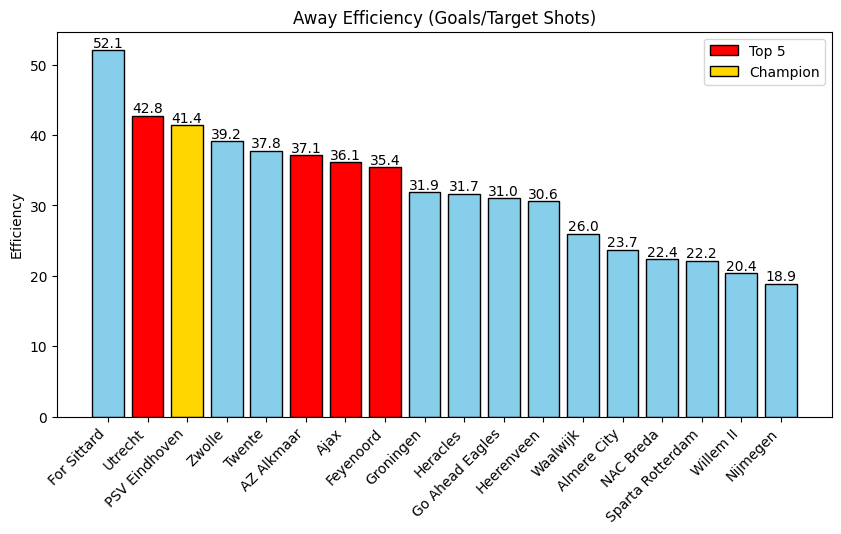

In [ ]:
###Away Efficiency 

away_efficiency_list = []
for item in away_team_dictionary:
    away_efficiency_list.append({"Team": item, "Efficiency": np.mean(away_team_dictionary[item])})

    
away_efficiency_dataframe = pd.DataFrame(away_efficiency_list)
sorted_df = away_efficiency_dataframe.sort_values(by='Efficiency', ascending=False)
fig, ax = plt.subplots(figsize=(10, 5))

#Setting up the colors
colors = ['skyblue','red','gold','skyblue','skyblue','red','red','red','skyblue','skyblue','skyblue','skyblue','skyblue','skyblue','skyblue','skyblue','skyblue','skyblue']


bar_container = ax.bar(sorted_df['Team'], sorted_df['Efficiency']*100, color=colors,edgecolor='black')
ax.set(ylabel='Efficiency', title='Away Efficiency (Goals/Target Shots)')
ax.bar_label(bar_container, fmt='{:,.1f}')
ax.set_xticks(range(len(sorted_df['Team'])),labels=sorted_df['Team'],rotation=45, ha='right')
#ax.grid(True)

legend_elements = [
    Patch(facecolor='red', edgecolor='black', label='Top 5'),
    Patch(facecolor='gold', edgecolor='black', label='Champion')
]

ax.legend(handles=legend_elements)

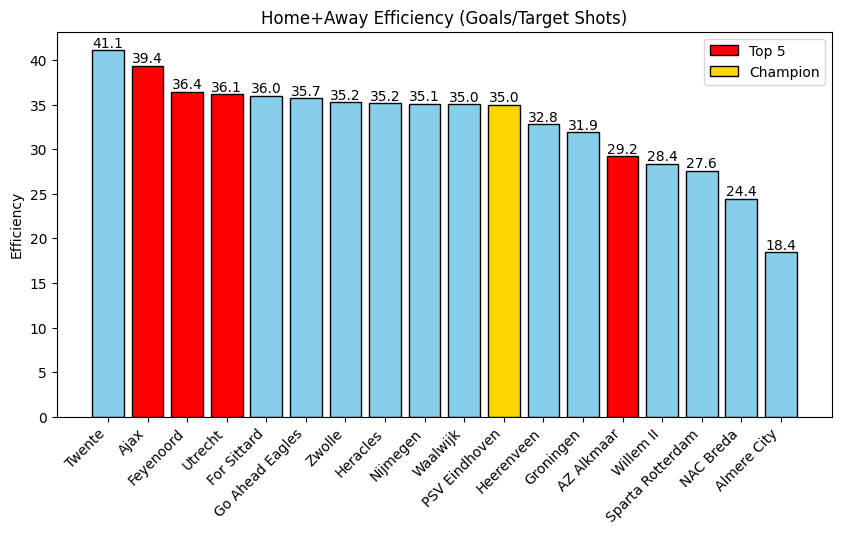

In [70]:
### Total Efficiency 
total_efficiency_list = []
for item in away_team_dictionary:
    away = away_team_dictionary[item]
    home = home_team_dictionary[item]
    total = home+away #merging everything 
    total_efficiency_list.append({"Team": item, "Efficiency": np.mean(total)})



total_efficiency_dataframe = pd.DataFrame(total_efficiency_list)
sorted_df = total_efficiency_dataframe.sort_values(by='Efficiency', ascending=False)
fig, ax = plt.subplots(figsize=(10, 5))

#Setting up the colors
colors = ['skyblue','red','red','red','skyblue','skyblue','skyblue','skyblue','skyblue','skyblue','gold','skyblue','skyblue','red','skyblue','skyblue','skyblue','skyblue']

bar_container = ax.bar(sorted_df['Team'], sorted_df['Efficiency']*100, color=colors,edgecolor='black')
ax.set(ylabel='Efficiency', title='Home+Away Efficiency (Goals/Target Shots)')
ax.bar_label(bar_container, fmt='{:,.1f}')
ax.set_xticks(range(len(sorted_df['Team'])),labels=sorted_df['Team'],rotation=45, ha='right')
#ax.grid(True)

legend_elements = [
    Patch(facecolor='red', edgecolor='black', label='Top 5'),
    Patch(facecolor='gold', edgecolor='black', label='Champion')
]

ax.legend(handles=legend_elements)
